In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
# 2. Load data
df = pd.read_excel("rumah_tangga.xlsx")
df = df[df['Jenis Kelamin'] == 'Perempuan']

# 3. Label Encoding
le_daerah = LabelEncoder()
le_umur = LabelEncoder()
df['Daerah_enc'] = le_daerah.fit_transform(df['Daerah'])
df['Umur_enc'] = le_umur.fit_transform(df['Kelompok Umur'])

# 4. Drop kolom yang tidak perlu dan urutkan
df = df.sort_values(by='Tahun')
df_model = df.drop(columns=['No', 'Jenis Kelamin', 'Daerah', 'Kelompok Umur'])


In [12]:
# 5. Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model)


In [13]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

sequence_length = 3
X, y = create_sequences(scaled_data, sequence_length)


In [14]:
# 7. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [15]:
# 8. Buat model Deep Learning: Conv1D + LSTM
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1]))
model.compile(optimizer='adam', loss='mse')


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# 9. Training model
es = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[es])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - loss: 0.2279 - val_loss: 0.2369
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1525 - val_loss: 0.1526
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.1238 - val_loss: 0.1253
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1053 - val_loss: 0.1227
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.1066 - val_loss: 0.1248
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.1029 - val_loss: 0.1203
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1022 - val_loss: 0.1115
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0985 - val_loss: 0.1084
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1015 - val_loss: 0.1094
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0940 - val_loss: 0.1021
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0906 - val_loss: 0.0979
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0887 - v

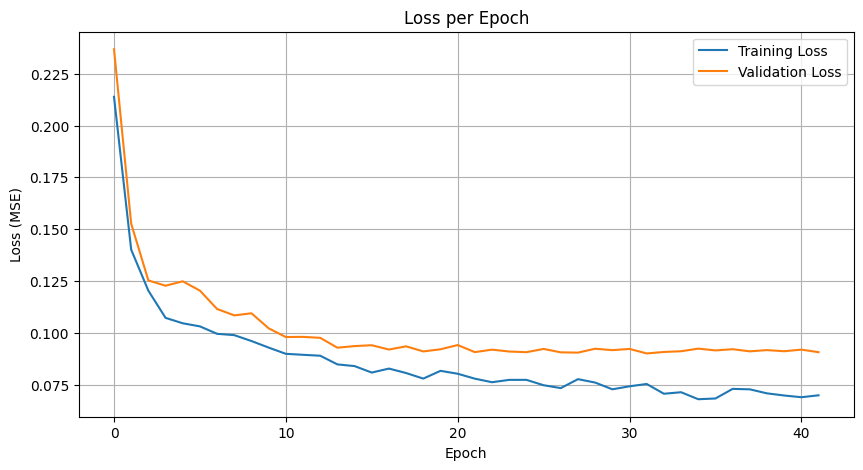

In [17]:
# 10. Visualisasi loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# 11. Simpan model
model.save("model_rumah_tangga.h5")
print("Model berhasil disimpan sebagai model_rumah_tangga.h5")

Model berhasil disimpan sebagai model_rumah_tangga.h5


In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss selama training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Prediksi training set (sebagai simulasi)
y_pred = model.predict(X)

# Evaluasi
mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

In [ ]:
# Prediksi untuk tahun 2025
latest_sequence = data[-window_size:]  # Ambil urutan terakhir
latest_sequence = np.array(latest_sequence).reshape((1, window_size, 1))
prediksi_2025 = model.predict(latest_sequence)

# Konversi hasil prediksi kembali ke skala asli
prediksi_2025_asli = scaler.inverse_transform(prediksi_2025)
print(f'Prediksi jumlah rumah tangga perempuan tahun 2025: {prediksi_2025_asli[0][0]:,.0f}')

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluasi model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model CNN-LSTM:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


In [ ]:

# Model CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(y_train.shape[1]))
model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=0)

# Model LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train.shape[1]))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=0)


In [ ]:

# Fungsi evaluasi
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_true = scaler.inverse_transform(np.hstack((X_test[:, -1, 0].reshape(-1, 1), y_test)))[:, 1:]
    y_pred_inv = scaler.inverse_transform(np.hstack((X_test[:, -1, 0].reshape(-1, 1), y_pred)))[:, 1:]
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_inv))
    mae = mean_absolute_error(y_true, y_pred_inv)
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

evaluate_model(model_cnn, "CNN")
evaluate_model(model_lstm, "LSTM")
evaluate_model(model, "CNN-LSTM")
